# Lab 8: Implement Your Machine Learning Project Plan

In this lab assignment, you will implement the machine learning project plan you created in the written assignment. You will:

1. Load your data set and save it to a Pandas DataFrame.
2. Perform exploratory data analysis on your data to determine which feature engineering and data preparation techniques you will use.
3. Prepare your data for your model and create features and a label.
4. Fit your model to the training data and evaluate your model.
5. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.

### Import Packages

Before you get started, import a few packages.

In [150]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need for this task.

In [151]:
# YOUR CODE HERE
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import load_iris

## Part 1: Load the Data Set


You have chosen to work with one of four data sets. The data sets are located in a folder named "data." The file names of the three data sets are as follows:

* The "adult" data set that contains Census information from 1994 is located in file `adultData.csv`
* The airbnb NYC "listings" data set is located in file  `airbnbListingsData.csv`
* The World Happiness Report (WHR) data set is located in file `WHR2018Chapter2OnlineData.csv`
* The book review data set is located in file `bookReviewsData.csv`



<b>Task:</b> In the code cell below, use the same method you have been using to load your data using `pd.read_csv()` and save it to DataFrame `df`.

In [152]:
# YOUR CODE HERE
adultDataSet_filename = os.path.join(os.getcwd(), "data", "adultData.csv")
df = pd.read_csv(adultDataSet_filename, header = 0)

## Part 2: Exploratory Data Analysis

The next step is to inspect and analyze your data set with your machine learning problem and project plan in mind. 

This step will help you determine data preparation and feature engineering techniques you will need to apply to your data to build a balanced modeling data set for your problem and model. These data preparation techniques may include:
* addressing missingness, such as replacing missing values with means
* renaming features and labels
* finding and replacing outliers
* performing winsorization if needed
* performing one-hot encoding on categorical features
* performing vectorization for an NLP problem
* addressing class imbalance in your data sample to promote fair AI


Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.


<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. 

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [153]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K


In [154]:
# YOUR CODE HERE
df.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary
32556,27.0,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38.0,United-States,<=50K
32557,40.0,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Non-Female,0,0,40.0,United-States,>50K
32558,58.0,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40.0,United-States,<=50K
32559,22.0,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Non-Female,0,0,20.0,United-States,<=50K
32560,52.0,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,14084,0,40.0,United-States,>50K


In [155]:
df.dtypes

age               float64
workclass          object
fnlwgt              int64
education          object
education-num       int64
marital-status     object
occupation         object
relationship       object
race               object
sex_selfID         object
capital-gain        int64
capital-loss        int64
hours-per-week    float64
native-country     object
income_binary      object
dtype: object

In [156]:
# YOUR CODE HERE
df.drop(columns = ['education','sex_selfID', 'race', 'native-country', 'relationship', 'marital-status', 'fnlwgt'], axis = 1, inplace =True)
df.head()

,age,workclass,education-num,occupation,capital-gain,capital-loss,hours-per-week,income_binary
0,39.0,State-gov,13,Adm-clerical,2174,0,40.0,<=50K
1,50.0,Self-emp-not-inc,13,Exec-managerial,0,0,13.0,<=50K
2,38.0,Private,9,Handlers-cleaners,0,0,40.0,<=50K
3,53.0,Private,7,Handlers-cleaners,0,0,40.0,<=50K
4,28.0,Private,13,Prof-specialty,0,0,40.0,<=50K


In [157]:
null_counts = df.isnull().sum()
null_counts

age                162
workclass         1836
education-num        0
occupation        1843
capital-gain         0
capital-loss         0
hours-per-week     325
income_binary        0
dtype: int64

In [158]:
df = df.dropna()
df

,age,workclass,education-num,occupation,capital-gain,capital-loss,hours-per-week,income_binary
0,39.0,State-gov,13,Adm-clerical,2174,0,40.0,<=50K
1,50.0,Self-emp-not-inc,13,Exec-managerial,0,0,13.0,<=50K
2,38.0,Private,9,Handlers-cleaners,0,0,40.0,<=50K
3,53.0,Private,7,Handlers-cleaners,0,0,40.0,<=50K
4,28.0,Private,13,Prof-specialty,0,0,40.0,<=50K
...,...,...,...,...,...,...,...,...
32556,27.0,Private,12,Tech-support,0,0,38.0,<=50K
32557,40.0,Private,9,Machine-op-inspct,0,0,40.0,>50K
32558,58.0,Private,9,Adm-clerical,0,0,40.0,<=50K
32559,22.0,Private,9,Adm-clerical,0,0,20.0,<=50K


In [159]:
df.dtypes

age               float64
workclass          object
education-num       int64
occupation         object
capital-gain        int64
capital-loss        int64
hours-per-week    float64
income_binary      object
dtype: object

## Part 3: Implement Your Project Plan

<b>Task:</b> Use the rest of this notebook to carry out your project plan. You will:

1. Prepare your data for your model and create features and a label.
2. Fit your model to the training data and evaluate your model.
3. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.


Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit.

In [160]:
# Variable X containing features.
# Variable y containing the label.
y = (df['capital-gain'] > 0).astype(int)
X = df.drop(['capital-gain', 'income_binary'], axis=1)

#seperate categorical and numerical data
categorical = ['workclass','occupation']
numerical = ['age', 'education-num', 'capital-loss', 'hours-per-week']

In [161]:
# A preprocessor to ensure that the data is in the right format
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical),
        ('cat', OneHotEncoder(), categorical)
    ],
    remainder='passthrough'
)

X_preprocessed = preprocessor.fit_transform(X)

In [162]:
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size = 0.3, random_state=1234)

In [163]:
#logistic regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

y_pred = logistic_model.predict(X_test)

lr_acc = accuracy_score(y_test, y_pred)

print("Accuracy:", lr_acc)

Accuracy: 0.9224669603524229


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [164]:
#decisions tree
decision_tree_model = DecisionTreeClassifier(random_state=1234)
decision_tree_model.fit(X_train, y_train)

dt_y_pred = decision_tree_model.predict(X_test)

dt_acc = accuracy_score(y_test, dt_y_pred)

print("Decision Tree Model Accuracy:", dt_acc)

Decision Tree Model Accuracy: 0.8727973568281938


In [165]:
#random forest
random_forest_model = RandomForestClassifier(random_state=1234)
random_forest_model.fit(X_train, y_train)

rf_y_pred = random_forest_model.predict(X_test)

rf_acc= accuracy_score(y_test, rf_y_pred)

print("Random Forest Model Accuracy:", rf_acc)

Random Forest Model Accuracy: 0.9013215859030838


In [166]:
esti = [('lr', logistic_model), ('dt', decision_tree_model), ('rf', random_forest_model)]

In [167]:
#StackingModels
stacked_classifier = StackingClassifier(estimators = esti)
stacked_classifier.fit(X_train, y_train)

y_pred = stacked_classifier.predict(X_test)

# Evaluate the stacked classifier
st_acc = accuracy_score(y_test, y_pred)

print("Stacked Classifier Accuracy:", st_acc)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Stacked Classifier Accuracy: 0.9222466960352423


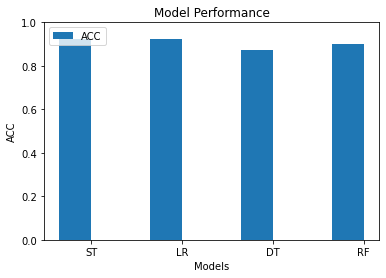

In [168]:
acc_Results = [st_acc, lr_acc, dt_acc, rf_acc]
labels = ['ST', 'LR','DT' ,'RF']
rg= np.arange(4)
width = 0.35

# 1. Create bar plot with RMSE results
# YOUR CODE HERE
plt.bar(rg, acc_Results, width, label="ACC")

# 3. Call plt.xticks() to add labels under the bars indicating which model the pair of RMSE 
# and R2 bars correspond to
# YOUR CODE HERE
plt.xticks(rg + width/2, labels)

# 4. Label the x and y axis of the plot: the x axis should be labeled "Models" and the y axis
# should be labeled "RMSE and R2"
# YOUR CODE HERE
plt.xlabel("Models")
plt.ylabel("ACC")

plt.ylim([0,1])
plt.title('Model Performance')
plt.legend(loc='upper left', ncol=2)
plt.show()

In [169]:
#Classifiaction Problem: predict weather or not capitail gain will be greater than 0
# Stacked Classifier and logistic regression have the same results leading me to believe that the logisitic regression model is best suited for this problem.